In [9]:
pip install google-api-python-client

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install os
!pip install matplotlib
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for os


In [ ]:
import os
import pandas as pd
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload
from google.oauth2.credentials import Credentials
import io

In [13]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Function to authenticate and build Google Drive service
def authenticate_google_drive():
    SCOPES = ['https://www.googleapis.com/auth/drive']
    creds = None
    
    if os.path.exists('client_secret_596813757402-ikg5h03odj3lvtlf849dake91j8f26rh.apps.googleusercontent.com.json'):
        creds = Credentials.from_authorized_user_file('D:\\Inventory-Analysis-main\\Inventory-Analysis-main\\client_secret_596813757402-ikg5h03odj3lvtlf849dake91j8f26rh.apps.googleusercontent.com.json', SCOPES)
    
    if not creds or not creds.valid:
        raise Exception("Google Drive API Authentication Failed!")
    
    service = build('drive', 'v3', credentials=creds)
    return service

In [22]:
# Function to download file from Google Drive
def download_file(service, file_id, destination):
    request = service.files().get_media(fileId=file_id)
    fh = io.FileIO(destination, 'wb')
    downloader = MediaIoBaseDownload(fh, request)
    
    done = False
    while done is False:
        status, done = downloader.next_chunk()
        print(f"Downloading {destination}... {int(status.progress() * 100)}%")
    print(f"{destination} download completed.")

In [ ]:
# Google Drive file IDs 
file_ids = {
    '2017PurchasePricesDec.csv': '1wj-UOt2ymXgxeRoCXXKTsIFBjyc-lwjs',
    'BegInvFINAL12312016.csv': '16BWRUDq54hna_-q3E_REcD9DbXNJ6zpz',
    'EndInvFINAL12312016.csv': '1CVwjXgLV6KYEFlrsG-vDkY9BUnTIIubB',
    'InvoicePurchases12312016.csv': '1wsbcKKTfoPEXnv-c0Vam2dryh8skwDfh',
    'PurchasesFINAL12312016.csv': '1Tz3Bx4M5dXBJuhtmPIBUdmZ5QaqmtxE9',
    'SalesFINAL12312016.csv': '10iKA2iEXke3fpjSHhW-jnqKXv5WTVwGa'
}


In [36]:
import os
import io
import pandas as pd
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload

def authenticate_google_drive():
    SCOPES = ['https://www.googleapis.com/auth/drive']
    creds = None
    
    # Path to your specific client secrets file
    client_secret_file = r'D:\Inventory-Analysis-main\Inventory-Analysis-main\client_secret_596813757402-ikg5h03odj3lvtlf849dake91j8f26rh.apps.googleusercontent.com.json'
    
    # Check if token.json exists and load it for quick login
    if os.path.exists('token.json'):
        creds = Credentials.from_authorized_user_file('token.json', SCOPES)
    
    # If no valid credentials are available, authenticate with OAuth and save the token.json file
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(client_secret_file, SCOPES)
            creds = flow.run_local_server(port=0)
            
            # Save the credentials for the next run as token.json
            with open('token.json', 'w') as token:
                token.write(creds.to_json())

    # Build the Google Drive service
    service = build('drive', 'v3', credentials=creds)
    return service

# Function to download file from Google Drive
def download_file(service, file_id, destination):
    request = service.files().get_media(fileId=file_id)
    
    # Ensure the directory exists
    os.makedirs(os.path.dirname(destination), exist_ok=True)
    
    fh = io.FileIO(destination, 'wb')
    downloader = MediaIoBaseDownload(fh, request)
    
    done = False
    while done is False:
        status, done = downloader.next_chunk()
        print(f"Downloading {destination}... {int(status.progress() * 100)}%")
    print(f"{destination} download completed.")

# Google Drive file IDs (replace these with actual file IDs from shared links)
file_ids = {
    '2017PurchasePricesDec.csv': '1wj-UOt2ymXgxeRoCXXKTsIFBjyc-lwjs',
    'BegInvFINAL12312016.csv': '16BWRUDq54hna_-q3E_REcD9DbXNJ6zpz',
    'EndInvFINAL12312016.csv': '1CVwjXgLV6KYEFlrsG-vDkY9BUnTIIubB',
    'InvoicePurchases12312016.csv': '1wsbcKKTfoPEXnv-c0Vam2dryh8skwDfh',
    'PurchasesFINAL12312016.csv': '1Tz3Bx4M5dXBJuhtmPIBUdmZ5QaqmtxE9',
    'SalesFINAL12312016.csv': '10iKA2iEXke3fpjSHhW-jnqKXv5WTVwGa'
}

# Authenticate and build Google Drive service
service = authenticate_google_drive()

# Download all files
for file_name, file_id in file_ids.items():
    destination_path = os.path.join("data", "raw", file_name)  # Ensure it's in the raw folder
    download_file(service, file_id, destination_path)

# Load the downloaded CSV files into pandas DataFrames
purchase_prices = pd.read_csv("data/raw/2017PurchasePricesDec.csv")
beg_inv = pd.read_csv("data/raw/BegInvFINAL12312016.csv")
end_inv = pd.read_csv("data/raw/EndInvFINAL12312016.csv")
invoice_purchases = pd.read_csv("data/raw/InvoicePurchases12312016.csv")
purchases = pd.read_csv("data/raw/PurchasesFINAL12312016.csv")
sales = pd.read_csv("data/raw/SalesFINAL12312016.csv")

# (Optional) Display one of the loaded dataframes to confirm successful loading
print(purchase_prices.head())


data\raw\2017PurchasePricesDec.csv download completed.
data\raw\BegInvFINAL12312016.csv download completed.
data\raw\EndInvFINAL12312016.csv download completed.
data\raw\InvoicePurchases12312016.csv download completed.
data\raw\PurchasesFINAL12312016.csv download completed.
data\raw\SalesFINAL12312016.csv download completed.
   Brand                  Description  Price   Size Volume  Classification  \
0     58  Gekkeikan Black & Gold Sake  12.99  750mL    750               1   
1     62     Herradura Silver Tequila  36.99  750mL    750               1   
2     63   Herradura Reposado Tequila  38.99  750mL    750               1   
3     72         No. 3 London Dry Gin  34.99  750mL    750               1   
4     75    Three Olives Tomato Vodka  14.99  750mL    750               1   

   PurchasePrice  VendorNumber                   VendorName  
0           9.28          8320  SHAW ROSS INT L IMP LTD      
1          28.67          1128  BROWN-FORMAN CORP            
2          30.46  

In [26]:
pip install google_auth_oauthlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
sales

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,4,51.80,12.95,2/12/2016,750,2,0.45,2000,SOUTHERN WINE & SPIRITS NE
1048571,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,8,103.60,12.95,2/13/2016,750,2,0.90,2000,SOUTHERN WINE & SPIRITS NE
1048572,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,1,12.95,12.95,2/19/2016,750,2,0.11,2000,SOUTHERN WINE & SPIRITS NE
1048573,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,3,38.85,12.95,2/22/2016,750,2,0.34,2000,SOUTHERN WINE & SPIRITS NE


In [38]:
print("purchase_prices Columns:")
print(purchase_prices.columns.tolist())

print("\nbeg_inv Columns:")
print(beg_inv.columns.tolist())

print("\nend_inv Columns:")
print(end_inv.columns.tolist())

print("\ninvoice_purchases Columns:")
print(invoice_purchases.columns.tolist())

print("\npurchases Columns:")
print(purchases.columns.tolist())

print("\nsales Columns:")
print(sales.columns.tolist())

purchase_prices Columns:
['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification', 'PurchasePrice', 'VendorNumber', 'VendorName']

beg_inv Columns:
['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'startDate']

end_inv Columns:
['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'endDate']

invoice_purchases Columns:
['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate', 'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval']

purchases Columns:
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber', 'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification']

sales Columns:
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity', 'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification', 'ExciseTax', 'VendorNo', 'VendorName']


In [39]:
# Checking for missing data in each dataset
datasets = [purchase_prices, beg_inv, end_inv, invoice_purchases, purchases, sales]
dataset_names = ["purchase_prices", "beg_inv", "end_inv", "invoice_purchases", "purchases", "sales"]

for name, data in zip(dataset_names, datasets):
    missing_values = data.isnull().sum()
    non_zero_missing_values = missing_values[missing_values > 0]
    
    if not non_zero_missing_values.empty:
        print(f"\nMissing values in {name}:")
        print(non_zero_missing_values)


Missing values in purchase_prices:
Description    1
Size           1
Volume         1
dtype: int64

Missing values in end_inv:
City    1284
dtype: int64

Missing values in invoice_purchases:
Approval    5169
dtype: int64

Missing values in purchases:
Size    3
dtype: int64


In [40]:
# Handling missing values for purchase_prices dataset
cols_to_check = ['Description', 'Size', 'Volume']
for col in cols_to_check:
    purchase_prices = purchase_prices[purchase_prices[col].notna()]

# Handling missing values for end_inv dataset
if end_inv['Store'].nunique() == end_inv['City'].nunique():
    city_store_mapping = end_inv[['Store', 'City']].drop_duplicates().set_index('Store').to_dict()['City']
    end_inv['City'] = end_inv['City'].fillna(end_inv['Store'].map(city_store_mapping))
else:
    end_inv['City'].fillna('Unknown', inplace=True)

# Handling missing values for invoice_purchases dataset
invoice_purchases['Approval'].fillna('Pending', inplace=True)

# Handling missing values for purchases dataset
purchases = purchases[purchases['Size'].notna()]

datasets = [purchase_prices, beg_inv, end_inv, invoice_purchases, purchases, sales]
dataset_names = ["purchase_prices", "beg_inv", "end_inv", "invoice_purchases", "purchases", "sales"]
for name, data in zip(dataset_names, datasets):
    missing_values = data.isnull().sum()
    non_zero_missing_values = missing_values[missing_values > 0]
    
    if not non_zero_missing_values.empty:
        print(f"\nMissing values in {name}:")
        print(non_zero_missing_values)
    else:
        print(f"\nNo missing values in {name}.")

C:\Users\Shreya\AppData\Local\Temp\ipykernel_27080\91626882.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  end_inv['City'].fillna('Unknown', inplace=True)
C:\Users\Shreya\AppData\Local\Temp\ipykernel_27080\91626882.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam


No missing values in purchase_prices.

No missing values in beg_inv.

No missing values in end_inv.

No missing values in invoice_purchases.

No missing values in purchases.

No missing values in sales.


In [41]:
# Cleaned dataset file names
cleaned_file_names = {
    'Cleaned_PurchasePricesDec.csv': purchase_prices,
    'Cleaned_BeginvFINAL12312016.csv': beg_inv,
    'Cleaned_EndinvFINAL12312016.csv': end_inv,
    'Cleaned_InvoicePurchases12312016.csv': invoice_purchases,
    'Cleaned_PurchasesFINAL12312016.csv': purchases,
    'Cleaned_SalesFINAL12312016.csv': sales
}

# Saving the cleaned datasets as new CSV files
for file_name, dataframe in cleaned_file_names.items():
    dataframe.to_csv(file_name, index=False)
    print(f"{file_name} has been saved successfully.")


Cleaned_PurchasePricesDec.csv has been saved successfully.
Cleaned_BeginvFINAL12312016.csv has been saved successfully.
Cleaned_EndinvFINAL12312016.csv has been saved successfully.
Cleaned_InvoicePurchases12312016.csv has been saved successfully.
Cleaned_PurchasesFINAL12312016.csv has been saved successfully.
Cleaned_SalesFINAL12312016.csv has been saved successfully.


In [42]:
sales

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,4,51.80,12.95,2/12/2016,750,2,0.45,2000,SOUTHERN WINE & SPIRITS NE
1048571,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,8,103.60,12.95,2/13/2016,750,2,0.90,2000,SOUTHERN WINE & SPIRITS NE
1048572,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,1,12.95,12.95,2/19/2016,750,2,0.11,2000,SOUTHERN WINE & SPIRITS NE
1048573,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,3,38.85,12.95,2/22/2016,750,2,0.34,2000,SOUTHERN WINE & SPIRITS NE


In [43]:
# Grouping by Brand and Description and summarize inventory for beginning of the year
beg_summary = beg_inv.groupby(['Brand', 'Description'])['onHand'].sum().sort_values(ascending=False)

# Grouping by Brand and Description and summarize inventory for end of the year
end_summary = end_inv.groupby(['Brand', 'Description'])['onHand'].sum().sort_values(ascending=False)

# Identifying top 5 products at the beginning and end of the year
top_5_beg = beg_summary.head(5)
top_5_end = end_summary.head(5)
# Identifying bottom 5 products at the beginning and end of the year
bottom_5_beg = beg_summary.tail(5)
bottom_5_end = end_summary.tail(5)

print("Top 5 products at the beginning of the year:\n", top_5_beg)
print("\nTop 5 products at the end of the year:\n", top_5_end)
print("\nBottom 5 products at the beginning of the year:\n", bottom_5_beg)
print("\nBottom 5 products at the end of the year:\n", bottom_5_end)

Top 5 products at the beginning of the year:
 Brand  Description               
4261   Capt Morgan Spiced Rum        15499
8068   Absolut 80 Proof              15341
3876   Smirnoff 80 Proof             14829
3545   Ketel One Vodka               14499
6879   Maurice's Mentholated Mint    14180
Name: onHand, dtype: int64

Top 5 products at the end of the year:
 Brand  Description            
3545   Ketel One Vodka            16770
4261   Capt Morgan Spiced Rum     16769
8111   Smirnoff 80 Proof          16242
8068   Absolut 80 Proof           15608
1233   Jack Daniels No 7 Black    15047
Name: onHand, dtype: int64

Bottom 5 products at the beginning of the year:
 Brand  Description                
13082  Cakebread Chard Rsv            0
17291  Westrey Oracle Vyd Pnt Nr      0
5596   Smirnoff Grand Cosmopolitan    0
6762   Paul Masson Chablis            0
14491  Wachau Federspiel Veltliner    0
Name: onHand, dtype: int64

Bottom 5 products at the end of the year:
 Brand  Description     

#### **Insights:**

**Top Products:**
* "Ketel One Vodka" emerged as the top product by the end of the year, even though it was in the 4th position at the beginning. This could imply an increased demand or higher restocking levels for this product during the ye
ar.
* "Capt Morgan Spiced Rum", initially the highest in inventory at the start of the year, narrowly missed the top position by a single unit by the year's 
end.
* "Smirnoff 80 Proof" seems to have undergone a brand update or rebranding, as the brand number changed from 3876 to 8111 during the year. Despite this, its popularity remained consistent.
* "Absolut 80 Proof" held steady, only dropping one rank from the beginning to the end of the year.
* A new entrant, "Jack Daniels No 7 Black", made its way into the top 5 by the end of the year, replacing "Maurice's Mentholated Mint" from the beginning of the year's list.


**Bottom Products:**

It's alarming to see products with zero inventory both at the beginning and the end of the year. It's possible that these items either never had stock during the entire year, or they had stock that was completely sold out and never replenished.

There isn't a significant overlap between the products in the bottom 5 of both lists, indicating that inventory for low-stock items could be fluctuating throughout the year.

The presence of wines and niche products among the bottom lists suggests that these might be specialty items with selective demand or limited supplyimited supply

**Inventory Management Observations:**

The overall high consistency among the top products suggests steady demand and effective inventory replenishment strategies for popular items.

However, the consistent zero counts at both year start and end for certain products indicate potential issues in inventory management or procurement. It may be worthwhile to review the demand for these products and determine if it makes business sense to continue carrying them or if there might be supply chain issues preventing their restocking.

##### Sales Analysis:

In [44]:
# Finding the best-selling products
best_selling_products = sales.groupby(['Brand', 'Description']).agg({'SalesQuantity': 'sum'}).sort_values(by='SalesQuantity', ascending=False).head(10)
print(f"Best selling ten products:\n{best_selling_products}\n")

# Finding the slow-moving products
slow_moving_products = sales.groupby(['Brand', 'Description']).agg({'SalesQuantity': 'sum'}).sort_values(by='SalesQuantity', ascending=True).head(10)
print(f"Slow-moving ten products:\n{slow_moving_products}")

Best selling ten products:
                                    SalesQuantity
Brand Description                                
8111  Smirnoff 80 Proof                     28544
1892  Yukon Jack                            23121
4261  Capt Morgan Spiced Rum                20226
3606  Smirnoff Raspberry Vodka              19200
5111  Dr McGillicuddy's Mentholmnt          18411
3837  Skyy Vodka                            14057
4135  Smirnoff Blueberry Vodka              12477
4157  Smirnoff Green Apple Vodka            12102
3545  Ketel One Vodka                       11883
8068  Absolut 80 Proof                      11189

Slow-moving ten products:
                                    SalesQuantity
Brand Description                                
19833 Terra di Montevero Toscana                1
105   Mr Boston Butterscotch                    1
21339 Flowers Sonoma Cst Chard                  1
15835 Ninety+Cellars Lot 33 Rose                1
44278 Scala Dei Negre Priorat                 

In [31]:
# sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])
# sales_quantity_trend = sales.groupby('SalesDate').agg({'SalesQuantity': 'sum'})
# sales_quantity_trend.plot(figsize=(12, 6), title='Sales Quantity Over Time')

<Axes: title={'center': 'Average Sales Price Over Time'}, xlabel='SalesDate'>

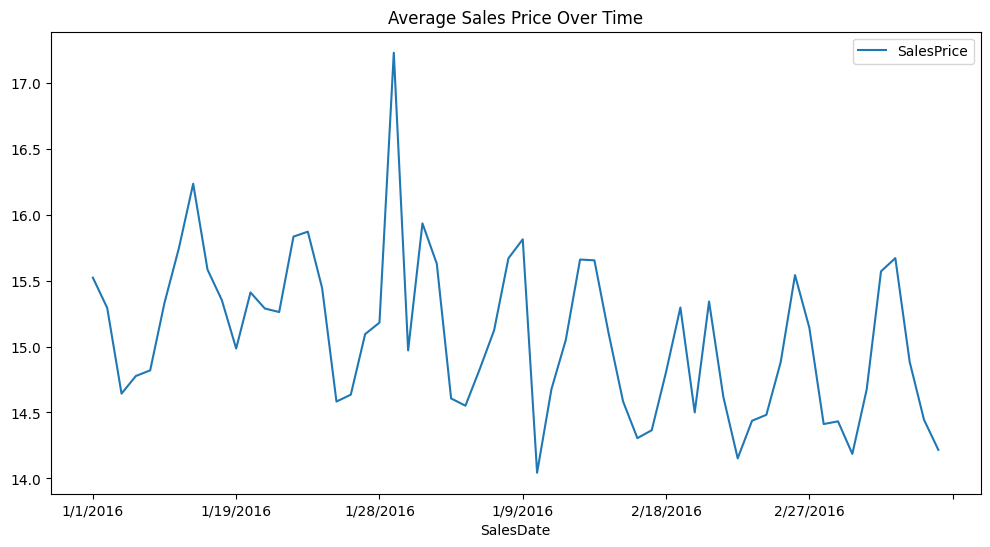

In [45]:
avg_price_trend = sales.groupby('SalesDate').agg({'SalesPrice': 'mean'})
avg_price_trend.plot(figsize=(12, 6), title='Average Sales Price Over Time')

- There's a cyclical nature to the sales quantities, which might hint at weekly patterns or trends.
- A significant peak is noticed around January 25th; this could be attributed to specific events, promotions, or even seasonal demands. However, as we transition into February, there's a noticeable decline in sales, which then appears to stabilize as the month progresses.
- Spirits like "Smirnoff 80 Proof" emerge as the top sellers, reflecting a steady demand. On the other hand, several products are moving slowly, indicating limited sales. As these products vary in type and brand, a strategic review might be necessary to decide on their continued stocking

In [46]:
vendor_purchase_volume = invoice_purchases.groupby('VendorName').agg({'Quantity': 'sum'}).sort_values(by='Quantity', ascending=False)
print("Top 10 Vendors by Purchase Volume:\n", vendor_purchase_volume.head(10))

Top 10 Vendors by Purchase Volume:
                              Quantity
VendorName                           
DIAGEO NORTH AMERICA INC      5459788
JIM BEAM BRANDS COMPANY       2737165
MARTIGNETTI COMPANIES         2637275
CONSTELLATION BRANDS INC      2325892
E & J GALLO WINERY            1858260
PERNOD RICARD USA             1647558
BACARDI USA INC               1427075
SAZERAC CO INC                1417727
M S WALKER INC                1372841
ULTRA BEVERAGE COMPANY LLP    1077527


In [47]:
vendor_purchase_cost = purchases.groupby('VendorName').agg({'PurchasePrice': 'sum'}).sort_values(by='PurchasePrice', ascending=False)
print("Top 10 Vendors by Purchase Cost:\n", vendor_purchase_cost.head(10))

Top 10 Vendors by Purchase Cost:
                              PurchasePrice
VendorName                                
DIAGEO NORTH AMERICA INC        3919293.52
JIM BEAM BRANDS COMPANY         2445075.37
PERNOD RICARD USA               2002210.70
MARTIGNETTI COMPANIES           1954748.37
ULTRA BEVERAGE COMPANY LLP      1328577.74
CONSTELLATION BRANDS INC        1316920.86
BACARDI USA INC                 1309369.34
E & J GALLO WINERY              1179960.50
BROWN-FORMAN CORP               1089218.08
M S WALKER INC                   979018.30


**Top Vendors by Purchase Cost:**

DIAGEO NORTH AMERICA INC stands out as the top vendor with the highest purchase cost, amounting to 3,919,293.52 US dollars. The following two vendors, 'JIM BEAM BRANDS COMPANY' and 'PERNOD RICARD USA', have notable purchase costs of 2,445,075.37 and 2,002,210.70, respectively. It's interesting to see that the top 10 vendors have a significant difference in their purchase costs, with 'DIAGEO NORTH AMERICA INC' nearly leading by a margin of 1.5 million usd from the vendor in the second position

In [48]:
# Converting PODate and ReceivingDate columns to datetime
purchases['PODate'] = pd.to_datetime(purchases['PODate'], errors='coerce')
purchases['ReceivingDate'] = pd.to_datetime(purchases['ReceivingDate'], errors='coerce')

# Checking if there are any null values after conversion
if purchases['PODate'].isnull().any() or purchases['ReceivingDate'].isnull().any():
    print("There are invalid date entries in the dataset. Please review the data.")
else:
    purchases['SupplyDuration'] = (purchases['ReceivingDate'] - purchases['PODate']).dt.days
    average_supply_duration = purchases['SupplyDuration'].mean()
    print("Average Supply Duration (in days):", average_supply_duration)

Average Supply Duration (in days): 7.620737197630656


In [49]:
purchases['InvoiceDate'] = pd.to_datetime(purchases['InvoiceDate'])
purchases['PayDate'] = pd.to_datetime(purchases['PayDate'])
purchases['PaymentDuration'] = (purchases['PayDate'] - purchases['InvoiceDate']).dt.days

average_payment_duration = purchases['PaymentDuration'].mean()
print("Average Payment Duration (in days):", average_payment_duration)

Average Payment Duration (in days): 35.658806366863914


**Supply and Payment Durations:**

On average, it takes approximately 7.62 days for the supply process, which indicates a relatively quick turnaround for receiving products after placing an order. However, the payment duration averages around 35.66 days. This could mean that there might be longer credit terms agreed upon with the vendors or there might be some delay in the payment process.

In [50]:
reduced_purchases = purchases[['VendorName', 'PurchasePrice']]
top_vendors = reduced_purchases.groupby('VendorName').sum()['PurchasePrice'].nlargest(10)
print(top_vendors)

VendorName
DIAGEO NORTH AMERICA INC       3919293.52
JIM BEAM BRANDS COMPANY        2445075.37
PERNOD RICARD USA              2002210.70
MARTIGNETTI COMPANIES          1954748.37
ULTRA BEVERAGE COMPANY LLP     1328577.74
CONSTELLATION BRANDS INC       1316920.86
BACARDI USA INC                1309369.34
E & J GALLO WINERY             1179960.50
BROWN-FORMAN CORP              1089218.08
M S WALKER INC                  979018.30
Name: PurchasePrice, dtype: float64


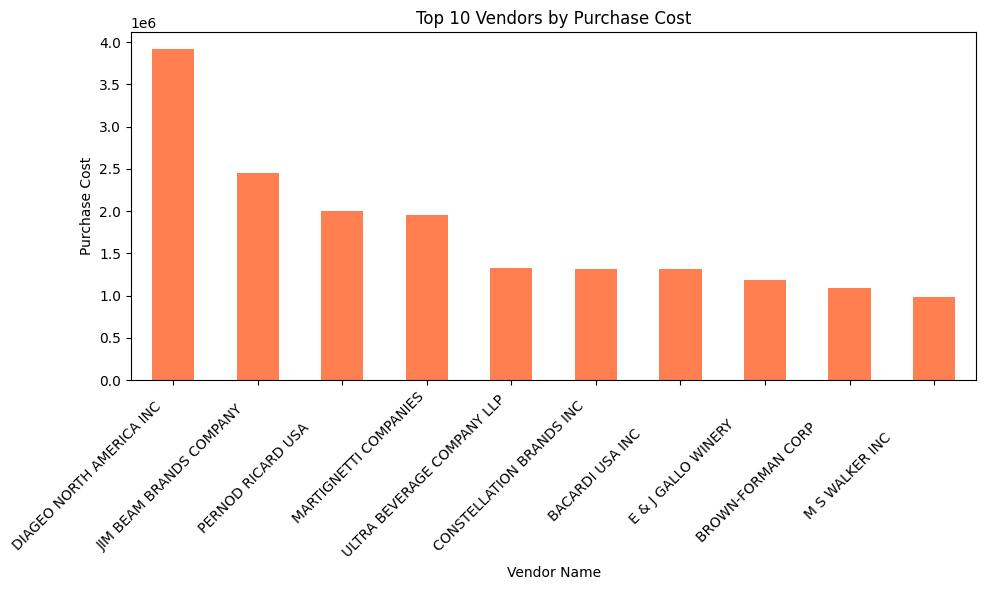

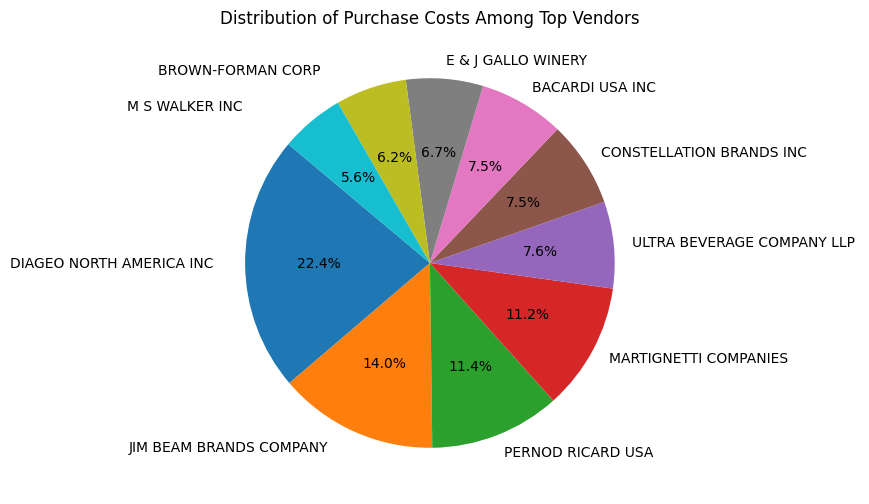

In [51]:
# Bar graph for top vendors by purchase cost
plt.figure(figsize=(10, 6))
top_vendors.plot(kind='bar', color='coral')
plt.title('Top 10 Vendors by Purchase Cost')
plt.ylabel('Purchase Cost')
plt.xlabel('Vendor Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Pie chart for distribution of purchase costs among the top vendors
plt.figure(figsize=(10, 6))
top_vendors.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Purchase Costs Among Top Vendors')
plt.ylabel('')  # to remove the default 'PurchasePrice' label from the y-axis
plt.show()

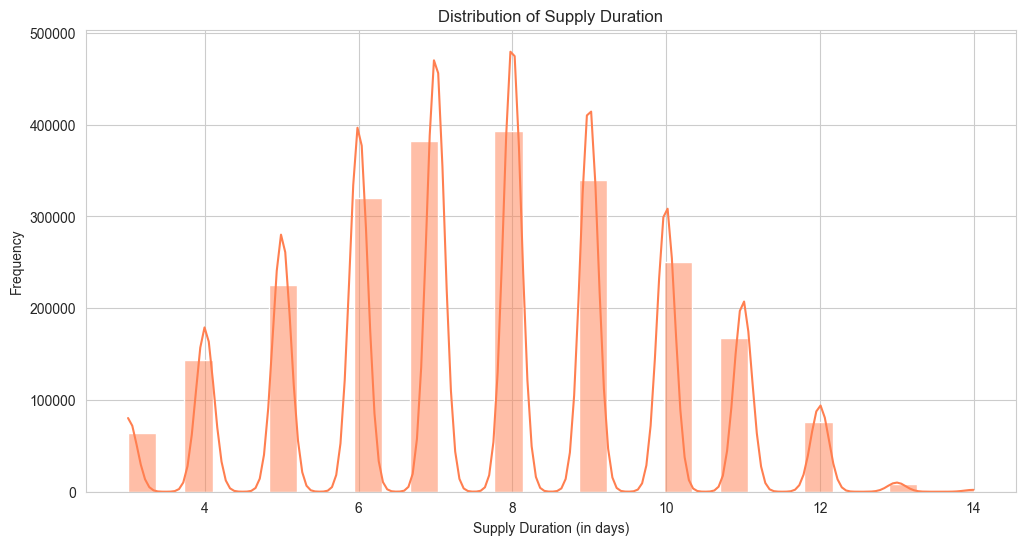

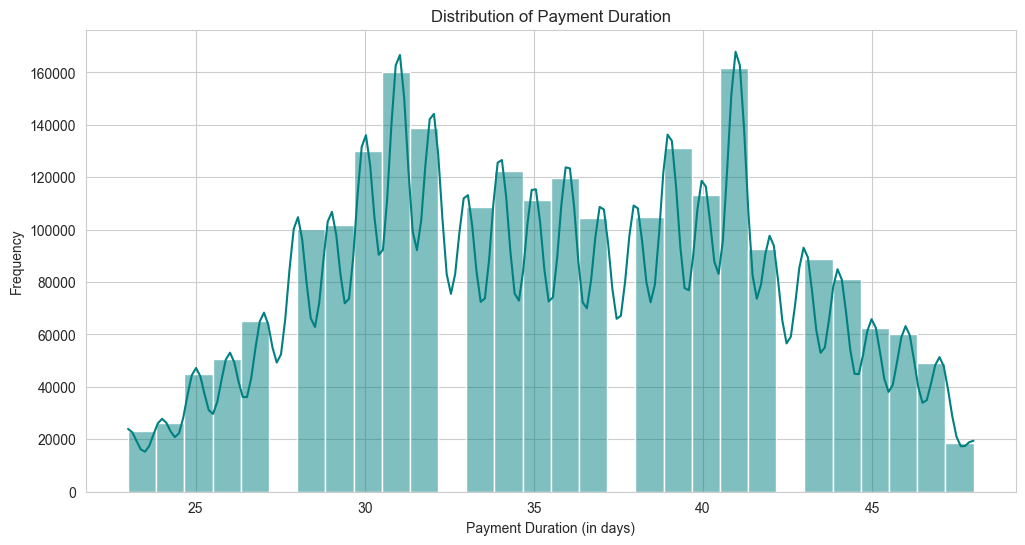

In [52]:
# Style settings
sns.set_style("whitegrid")

# Histogram for Supply Duration
plt.figure(figsize=(12, 6))
sns.histplot(purchases['SupplyDuration'], kde=True, bins=30, color='coral')
plt.title('Distribution of Supply Duration')
plt.xlabel('Supply Duration (in days)')
plt.ylabel('Frequency')
plt.show()

# Histogram for Payment Duration
plt.figure(figsize=(12, 6))
sns.histplot(purchases['PaymentDuration'], kde=True, bins=30, color='teal')
plt.title('Distribution of Payment Duration')
plt.xlabel('Payment Duration (in days)')
plt.ylabel('Frequency')
plt.show()

Cleaned_PurchasePricesDec.csv has been saved successfully.
Cleaned_BeginvFINAL12312016.csv has been saved successfully.
Cleaned_EndinvFINAL12312016.csv has been saved successfully.
Cleaned_InvoicePurchases12312016.csv has been saved successfully.
Cleaned_PurchasesFINAL12312016.csv has been saved successfully.
Cleaned_SalesFINAL12312016.csv has been saved successfully.


In [74]:
# from googleapiclient.http import MediaFileUpload

In [80]:
# import time
# from googleapiclient.errors import HttpError

# inventory_analysis_folder_id = '1XfmifAqwr9hJKUjZIu1kJpqbIIw1ZisG?'  

# def upload_file(service, file_name, folder_id=None, retries=3):
#     file_metadata = {'name': file_name}
#     if folder_id:
#         file_metadata['parents'] = [folder_id]
    
#     media = MediaFileUpload(file_name, mimetype='text/csv')

#     for attempt in range(retries):
#         try:
#             file = service.files().create(body=file_metadata, media_body=media, fields='id').execute()
#             print(f"Uploaded {file_name} with file ID: {file.get('id')}")
#             break  # Exit the loop if upload is successful
#         except HttpError as error:
#             print(f"An error occurred: {error}")
#             if attempt < retries - 1:
#                 time.sleep(2)  # Wait before retrying
#             else:
#                 print(f"Failed to upload {file_name} after {retries} attempts.")
#         except Exception as e:
#             print(f"An unexpected error occurred: {e}")
#             break  # Exit on unexpected errors

# # Upload the cleaned files back to Google Drive into the "CleanedData" folder
# for file_name in cleaned_file_names.keys():
#     upload_file(service, file_name, folder_id=cleaned_data_folder_id)


Uploaded Cleaned_PurchasePricesDec.csv with file ID: 1zosZKjE3jwiqdnmTb5cR4yIpRlcF59Rn
Uploaded Cleaned_BeginvFINAL12312016.csv with file ID: 1dKMQ5cgf1YhogBv6oaR0ZW1tbdchfb7L
Uploaded Cleaned_EndinvFINAL12312016.csv with file ID: 1AkKulHa1-TtFzHeXF_oqopk9WRuQicZA
Uploaded Cleaned_InvoicePurchases12312016.csv with file ID: 1NmEquYOADcYMA6ReYps0og1fnQCHtzKz
An unexpected error occurred: The write operation timed out
An unexpected error occurred: The write operation timed out
